In [2]:
# The EEG Motor Movement dataset contains: 109 Subjects
# Each subject contains 14 tests tobe done
# We are going to focus on the Task 4
# Imagining opening and closing both fists or feet
# Each Task from 3. to 6. (Task 1 - 4) runs twice

import mne

Topic Abstract:

Idea 1:

Baseline, eyes open (1-min), divide into 12 sections, each section 5 seconds.
Baseline, eyes closed (1-min), divide into 12 sections, each section 5 seconds.
Use ViT & Contrastive Learning for model training

Accuracy in Report: Produce heatgram of attention map about intents. Research attention map produced to know which electros are more important. Which part of the brain is more responsible for the classifier.

Personal Task: Data transform to image, librosa melspectrogram

  1-Transform each of the 12 sections to melspectrogram, then download them in sequence.

  2-Complicated part: combine 1 sec - 64 channels, into 1 image to analyze, one by each other no gaps, produce heatmap to know which part is being paid more attention.

  Report Structure: *

Subject 01 Experiment Run 1 and 2:

Number of channels: 64
Number of samples: 9760
Sampling frequency 160.00 Hz
(Number of Samples 9760 / Sample Rate 160Hz = 61(s))

Sample Experiment Run 1 Plot

In [2]:
# Copy from input to output folder for better opimage_outputimage_output_2etaion
# !cp -r "../input/experiment-1-mergedimages" ./

In [ ]:
!cp -r "../input/eeg-motor-movementimagery-dataset" ./

'cp' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [12]:
import os
# os.mkdir('/kaggle/working/grouped_images_experiment_1/') 
# os.mkdir('/kaggle/working/grouped_images_experiment_2/') 

In [ ]:
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

In [20]:
import shutil
import os
# os.mkdir('/kaggle/working/image_output_2/')
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [26]:
subject = 1  # use data from subject 1
runs = [2]

files = eegbci.load_data(subject, runs, 'C:/Users/gille/Downloads/Compressed/files/S001')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()


Extracting EDF parameters from C:\Users\gille\Downloads\Compressed\files\S001\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Extracting EDF parameters from /kaggle/working/eeg-motor-movementimagery-dataset/files/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


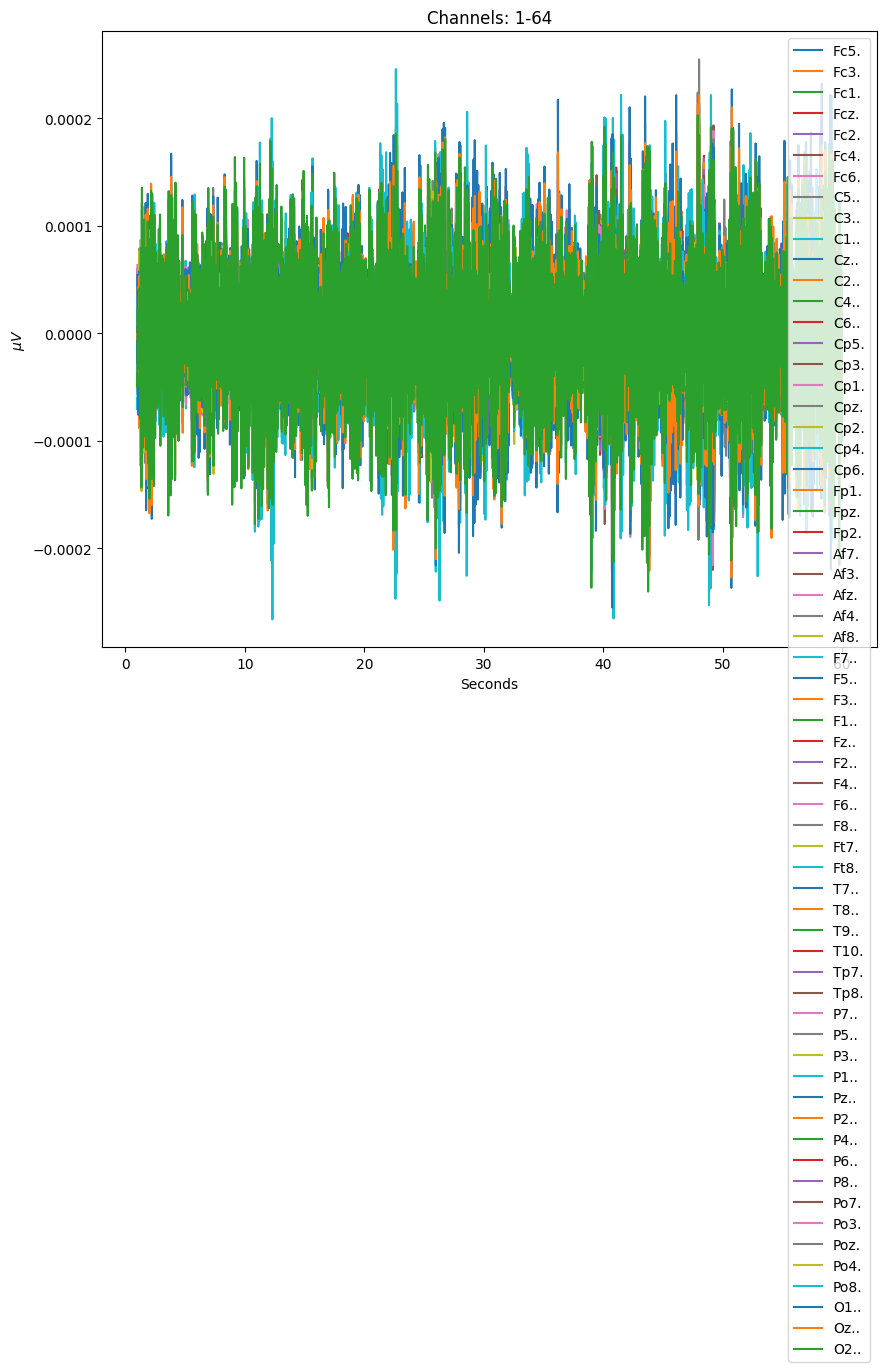

In [31]:
sfreq = raw_obj.info['sfreq']
sfreq = raw_obj.info['sfreq']
raw_obj.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

data, times = raw_obj[:-1,int(sfreq * 1):int(sfreq * 60)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-64');
plt.legend(raw_obj.ch_names);


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)


C:\Users\gille\AppData\Local\Temp\ipykernel_24812\479514963.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_obj.plot_psd(tmax=np.inf, fmax = 40)
C:\Users\gille\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


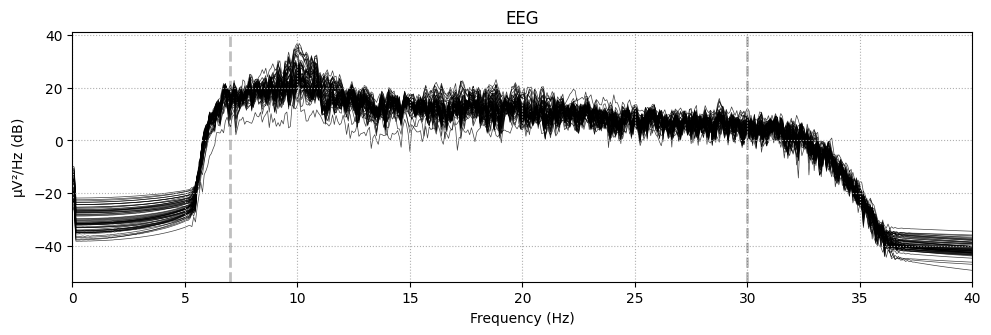

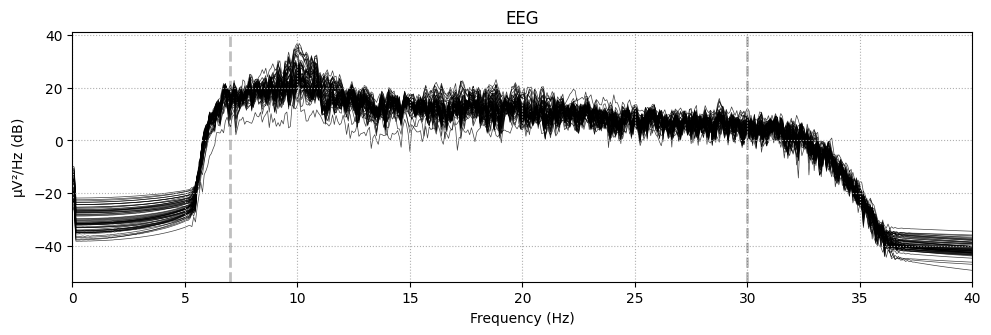

In [35]:
# %matplotlib qt
raw_obj.plot_psd(tmax=np.inf, fmax = 40)

In [41]:
import os
#import numpy as np
import pandas as pd
import mne

#import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, find_events, pick_types, set_eeg_reference
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne import viz

Issues with raw_obj dataframe and raw_data column, index of dataframe and raw_data not corresponding to each other, so needed to compare data

In [42]:
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
event_ids

Used Annotations descriptions: ['T0']


{'T0': 1}

In [43]:
layout = mne.channels.read_layout("EEG1005")
print(dir(layout))
layout.names

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'box', 'ids', 'kind', 'names', 'plot', 'pos', 'save']


['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'I1',
 'Iz',
 'I2',
 'AFp9h',
 'AFp7h',
 'AFp5h',
 'AFp3h',
 'AFp1h',
 'AFp2h',
 'AFp4h',
 'AFp6h',
 'AFp8h',
 'AFp10h',
 'AFF9h',
 'AFF7h',
 'AFF5h',
 'AFF3h',
 'AFF1h',
 'AFF2h',
 'AFF4h',
 'AFF6h',
 'AFF8h',
 'AFF10h',
 'FFT9h',
 'FFT7h',
 'FFC5h',
 'FFC3h',
 'FFC1h',
 'FFC2h',
 'FFC4h',
 'FFC6h',
 'FFT8h',
 'FFT10h',
 'FTT9h',
 'FTT7h',
 'FCC5h',
 'FCC3h',
 

In [44]:
montage_1 = mne.channels.make_standard_montage("standard_1005")

montage_1.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'I1',
 'Iz',
 'I2',
 'AFp9h',
 'AFp7h',
 'AFp5h',
 'AFp3h',
 'AFp1h',
 'AFp2h',
 'AFp4h',
 'AFp6h',
 'AFp8h',
 'AFp10h',
 'AFF9h',
 'AFF7h',
 'AFF5h',
 'AFF3h',
 'AFF1h',
 'AFF2h',
 'AFF4h',
 'AFF6h',
 'AFF8h',
 'AFF10h',
 'FFT9h',
 'FFT7h',
 'FFC5h',
 'FFC3h',
 'FFC1h',
 'FFC2h',
 'FFC4h',
 'FFC6h',
 'FFT8h',
 'FFT10h',
 'FTT9h',
 'FTT7h',
 'FCC5h',
 'FCC3h',
 

In [46]:
ch_names = raw_obj.ch_names
ch_names = [ x.replace(".","") for x in ch_names]
ch_names = [ x.upper() for x in ch_names]

len(ch_names)

64

In [48]:
montage_2 = [x.upper() for x in montage_1.ch_names]
x2 = [x.upper() for x in ch_names]
list(set(montage_2) - set(x2)) #Initialement c'est x1 mais ça génerais une erreur

['POO3H',
 'AFF2H',
 'POO7H',
 'PO7H',
 'TP10H',
 'POO5H',
 'PO5',
 'FTT8H',
 'PO2H',
 'POO8',
 'CPP2H',
 'CCP6H',
 'PPO2H',
 'AFP5',
 'FT10',
 'FFC4H',
 'FFC5',
 'POO1',
 'AF6H',
 'TTP9H',
 'TP9H',
 'O1H',
 'TP7H',
 'P3H',
 'C4H',
 'P9H',
 'P9',
 'P8H',
 'AFP3H',
 'FT7H',
 'CP1H',
 'POO4',
 'CCP2H',
 'FCC6H',
 'AF6',
 'C1H',
 'AFF5',
 'FCC5H',
 'TTP8H',
 'O2H',
 'PPO6H',
 'CCP5',
 'FFC5H',
 'T3',
 'CPP1H',
 'AFP9H',
 'FCC3H',
 'POO4H',
 'AF2',
 'AFFZ',
 'F1H',
 'POO8H',
 'POO3',
 'TTP8',
 'F9H',
 'AFF7',
 'PO2',
 'FTT10',
 'PPOZ',
 'T9H',
 'FTT10H',
 'M1',
 'AFP5H',
 'AFF10H',
 'FCC2',
 'AF1H',
 'AF10H',
 'I1',
 'FTT7',
 'CPP3',
 'P7H',
 'POO10',
 'TPP10',
 'CCP3H',
 'PPO8',
 'AF5H',
 'AFF7H',
 'P6H',
 'F7H',
 'PPO2',
 'POOZ',
 'AFF3',
 'FCCZ',
 'AFF4H',
 'CPP4',
 'AF3H',
 'FTT9H',
 'CPP5',
 'FT10H',
 'F9',
 'FFT7',
 'PO5H',
 'CP2H',
 'FFC2H',
 'PPO7H',
 'AF8H',
 'C6H',
 'AFF9',
 'FP1H',
 'FFT10H',
 'CPPZ',
 'CCP3',
 'PPO1',
 'AFP3',
 'FCC2H',
 'CPP5H',
 'AFF3H',
 'AFP10H',
 'PPO9H',


In [49]:
kept_channels = ch_names

ind = [i for (i, channel) in enumerate(montage_2) if channel in kept_channels]
montage_new = montage_1.copy()

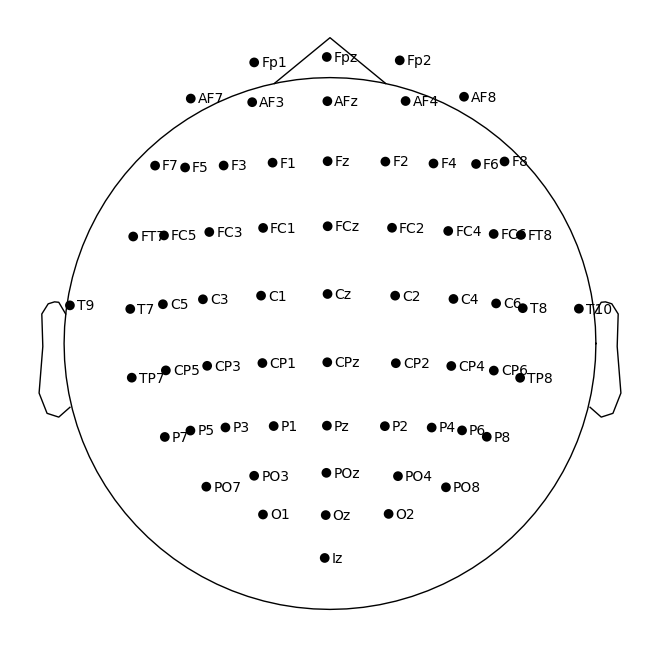

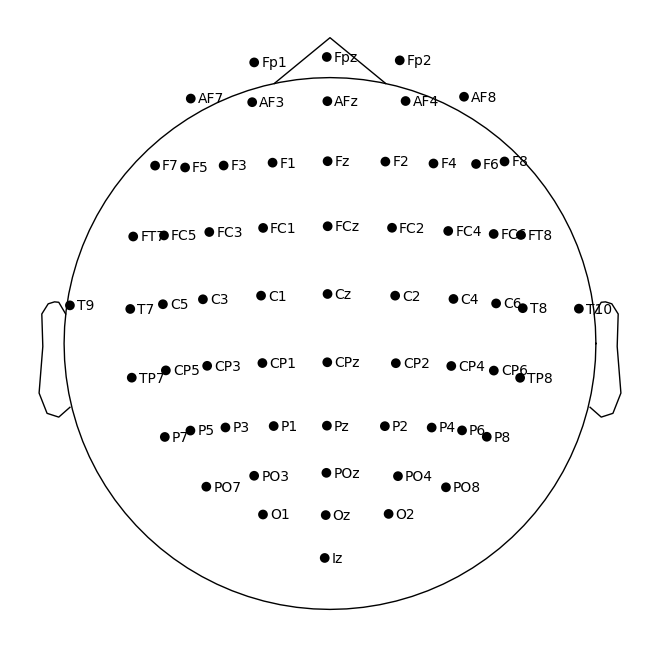

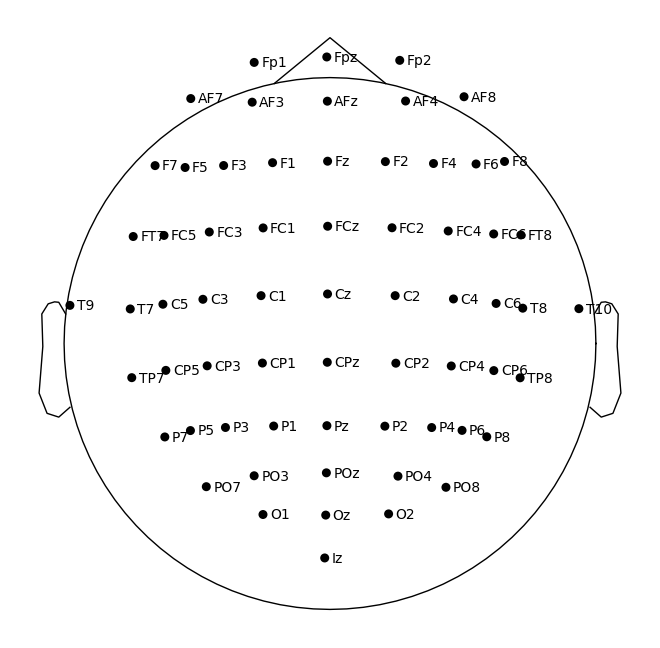

In [50]:
montage_new.ch_names = [montage_1.ch_names[x] for x in ind]
kept_channel_info = [montage_1.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
montage_new.dig = montage_1.dig[0:3]+kept_channel_info
montage_new.plot()
montage_new.plot()

In [51]:
montage_new.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'AF4',
 'AF8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [52]:
montage_new.ch_names = [x.upper() for x in montage_new.ch_names]
montage_names = ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
montage_names_2 = [x.upper() for x in montage_names]
montage_names_2 = [x.replace(".","") for x in montage_names_2]

In [53]:
list(set(montage_new.ch_names) - set(montage_names_2))
list(set(montage_names_2) - set(montage_new.ch_names))

[]

In [54]:
montage_new_names = []
for x in montage_new.ch_names:
    for i, s in enumerate(montage_names_2):
        if x == s:
            montage_new_names.append(i)

In [55]:
montage_new.ch_names = [(montage_names[x]) for x in montage_new_names]


In [56]:
raw_obj = raw_obj.set_montage(montage_new, match_case=False, match_alias=False )
# updated_mont = raw_obj.get_montage() #also works with epo.get_montage()

In [57]:
updated_mont = raw_obj.get_montage() #also works with epo.get_montage()


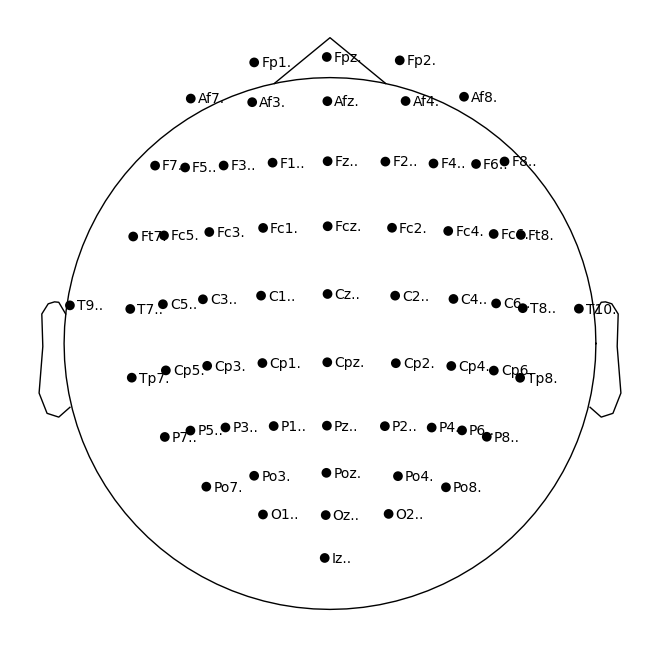

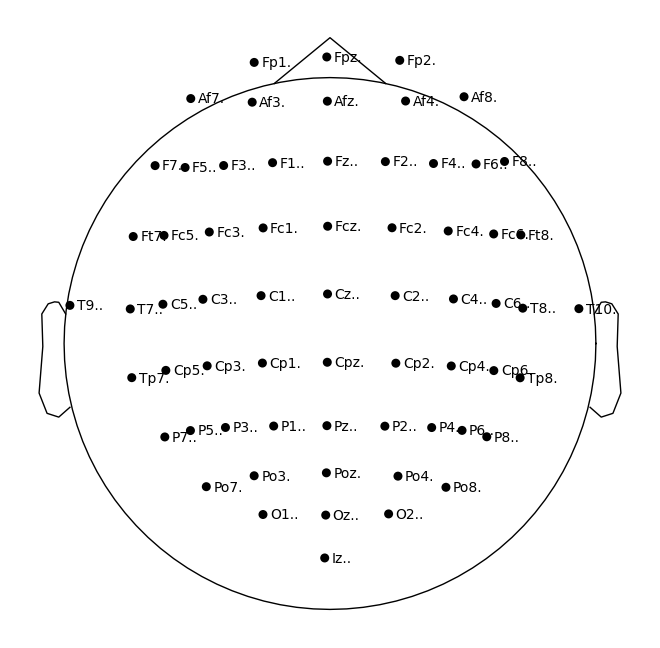

In [58]:
updated_mont.plot()


In [59]:
#df.to_csv("data_frame.csv")


NameError: name 'df' is not defined

In [61]:
import pandas as pd

raw_data_df = pd.DataFrame()

for index in range(len(raw_data)):
    raw_data_df[index] = [float("{:f}".format(float(x)))*1000000 for x in raw_data[index]]

raw_data_df.to_csv("raw_data.csv")

for data_col in raw_data:
    a = list(data_col)[0]
    print(a)

raw_obj.to_data_frame()




-4.6e-05
-4.1e-05
-3.2e-05
-2.4e-05
-2.3e-05
-2.4e-05
-1.4999999999999999e-05
-4.1e-05
-2.9e-05
-2.9999999999999997e-05
-1.8999999999999998e-05
2e-06
-3e-06
9.999999999999999e-06
-2.4e-05
-1.7e-05
-1.8999999999999998e-05
-4e-06
2e-06
1.4999999999999999e-05
1.7e-05
-0.00011399999999999999
-9.999999999999999e-05
-9.8e-05
-0.000102
-9.6e-05
-6.3e-05
-9.9e-05
-0.000124
-6.9e-05
-5.1e-05
-2.4999999999999998e-05
-6.1e-05
-4.7e-05
-4.8e-05
-7.3e-05
-7.599999999999999e-05
-0.00010499999999999999
-6.599999999999999e-05
-1.8e-05
-3.5e-05
1.4e-05
-3.2e-05
1e-06
-5.2e-05
2.6e-05
-2.6e-05
-4.9999999999999996e-06
4.9999999999999996e-06
1.4999999999999999e-05
1.9999999999999998e-05
4.1e-05
3.4e-05
3.2e-05
4.4999999999999996e-05
1.8e-05
2.3e-05
4.9999999999999996e-05
6.9e-05
5.2e-05
5.4e-05
3.9999999999999996e-05
0.000108
5.4999999999999995e-05


,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,0.00000,-1.694066e-15,-1.355253e-14,-6.776264e-15,5.082198e-15,-5.082198e-15,1.185846e-14,0.000000e+00,-3.388132e-15,0.000000e+00,...,1.270549e-14,1.016440e-14,1.694066e-15,6.776264e-15,2.879912e-14,2.371692e-14,6.776264e-15,3.388132e-15,-1.694066e-15,0.000000e+00
1,0.00625,-8.386463e+00,-9.999962e+00,-9.223509e+00,-8.309037e+00,-1.068230e+01,-1.532239e+01,-1.930349e+01,2.690230e+00,-3.123127e+00,...,3.037229e+00,1.895962e+01,1.852747e+01,2.174013e+01,4.546948e+00,4.183601e+00,2.636359e+01,4.063134e+01,2.770620e+01,3.698926e+01
2,0.01250,-1.270756e+01,-1.285130e+01,-1.074005e+01,-7.402239e+00,-9.996491e+00,-1.612753e+01,-1.919760e+01,2.136542e+00,-3.459882e+00,...,-2.547868e+00,2.612659e+01,2.482833e+01,2.809077e+01,4.431309e+00,-2.408355e+00,4.376639e+01,6.244469e+01,3.966913e+01,5.497372e+01
3,0.01875,-1.175520e+01,-7.752185e+00,-3.094206e+00,3.646823e+00,2.241202e+00,-2.651935e+00,-1.800690e+00,-4.580712e-01,-5.235400e-01,...,-1.618714e+01,1.963500e+01,1.801987e+01,1.671968e+01,-3.478619e+00,-2.069121e+01,4.612623e+01,5.776701e+01,3.029132e+01,4.691214e+01
4,0.02500,-7.776974e+00,-2.978183e-01,7.942472e+00,1.684317e+01,1.536846e+01,1.138391e+01,1.288870e+01,-7.236624e-01,3.626977e+00,...,-2.945048e+01,6.805724e+00,6.201507e+00,-3.300436e+00,-2.043362e+01,-4.281685e+01,3.306088e+01,3.283719e+01,4.415527e+00,2.118406e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,60.96875,9.655245e-02,1.113411e-01,1.389414e-01,1.619664e-01,1.118983e-01,8.284941e-02,2.800924e-02,5.445230e-02,3.335503e-02,...,-2.451836e-01,-4.409490e-01,-4.186530e-01,-4.145666e-01,-3.769979e-01,-4.394320e-01,-5.788661e-01,-5.155009e-01,-5.038196e-01,-3.699933e-01
9756,60.97500,7.633508e-02,8.716240e-02,1.097835e-01,1.296123e-01,9.099818e-02,6.958430e-02,2.636380e-02,4.056790e-02,2.326862e-02,...,-2.048248e-01,-3.688728e-01,-3.488703e-01,-3.479399e-01,-3.194522e-01,-3.708320e-01,-4.881726e-01,-4.383084e-01,-4.314895e-01,-3.179518e-01
9757,60.98125,5.086912e-02,5.784469e-02,7.427730e-02,8.934673e-02,6.381780e-02,5.044575e-02,2.133083e-02,2.501743e-02,1.317990e-02,...,-1.466171e-01,-2.650503e-01,-2.500293e-01,-2.501216e-01,-2.306092e-01,-2.674244e-01,-3.535021e-01,-3.189189e-01,-3.150008e-01,-2.340954e-01
9758,60.98750,2.478313e-02,2.816459e-02,3.693177e-02,4.521787e-02,3.275685e-02,2.656496e-02,1.215464e-02,1.125488e-02,5.399517e-03,...,-7.624692e-02,-1.383788e-01,-1.303444e-01,-1.305068e-01,-1.204670e-01,-1.397550e-01,-1.856906e-01,-1.679454e-01,-1.660433e-01,-1.244525e-01


In [62]:
channel_names = raw_obj.ch_names

channel_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [63]:
channel_categories = {"Fp":['Fp1.', 'Fpz.', 'Fp2.'],
                      "Af":['Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.'], 
                      "F":['F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..'], 
                      "Ft":['Ft7.', 'Ft8.'], 
                      "Fc":['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.'], 
                      "T":['T7..', 'T8..', 'T9..', 'T10.'], 
                      "C":['C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..'], 
                      "Tp":['Tp7.', 'Tp8.'], 
                      "Cp": ['Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.'], 
                      "P":['P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..'], 
                      "Po":['Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.'], 
                      "O":[ 'O1..', 'Oz..', 'O2..'], 
                      "I":['Iz..']
                     }

In [64]:
import pandas as pd
df = raw_obj.to_data_frame()

In [65]:
cat_avg = {"Fp":_,"Af":_,"F":_,"Ft":_,"Fc":_,"T":_,"C":_,"Tp":_,"Cp":_,"P":_,"Po":_,"O":_,"I":_}


In [66]:
for channel_category in channel_categories:
    arr = channel_categories[channel_category]
    print("Arr:", len(arr))

cat_seq = ["Fc","C","Cp","Fp","Af","F","Ft","T","Tp","P","Po","O","I"]

grouped_raw = []

Arr: 3
Arr: 5
Arr: 9
Arr: 2
Arr: 7
Arr: 4
Arr: 7
Arr: 2
Arr: 7
Arr: 9
Arr: 5
Arr: 3
Arr: 1


Download complete in 04m10s (1.2 MB)
Extracting EDF parameters from c:\Users\gille\OneDrive\Documents\Stage 22-23\eeg-motor-movementimagery-dataset\files\MNE-eegbci-data\files\eegmmidb\1.0.0\S106\S106R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Fp
Sum:  0       0.000079
1       0.000052
2       0.000112
3       0.000071
4       0.000060
          ...   
9755    0.000000
9756    0.000000
9757    0.000000
9758    0.000000
9759    0.000000
Name: Fp1., Length: 9760, dtype: float64 

Avg:  0       0.000026
1       0.000017
2       0.000037
3       0.000024
4       0.000020
          ...   
9755    0.000000
9756    0.000000
9757    0.000000
9758    0.000000
9759    0.000000
Name: Fp1., Length: 9760, dtype: float64 

Af
Sum:  0       0.000148
1       0.000160
2       0.000192
3       0.000133
4       0.000126
          ...   
9755    0.000000
9756    0.000000
9757    0.000000
9758    0.0000

C:\Users\gille\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=813
  warnings.warn(



Start: 0, End: 813, Subject 106, Channel 0, Segment 0


FileNotFoundError: [Errno 2] No such file or directory: './grouped_images_experiment_2/subject_106_channel_0_segment_0.png'

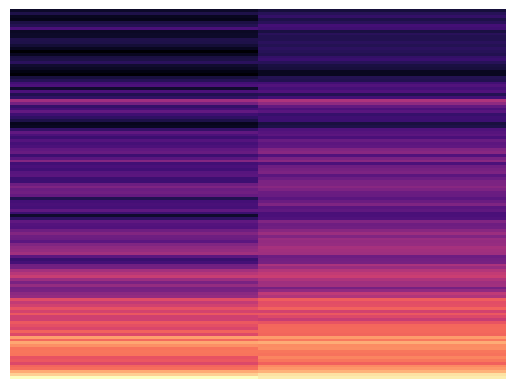

In [67]:
import numpy as np
# For multiple subject
# Loop through all channels within one category
# eg: "Fp1, Fp2, Fpz" would average values and create a new df column

for i in range(106,109+1):
    subject = i  # use data from subject 1 - 109
    runs = [2]  # experiment 1

    grouped_raw = []

    files = eegbci.load_data(subject, runs, './eeg-motor-movementimagery-dataset/files/')
    #Read raw data files where each file contains a run
    raws = [read_raw_edf(f, preload=True) for f in files]
    #Combine all loaded runs
    raw_obj = concatenate_raws(raws)
    raw_data = raw_obj.get_data()
#     import pandas as pd
    df = raw_obj.to_data_frame()

    for channel_category in channel_categories:
        sum = 0
        cat_len = len(channel_categories[channel_category])
        for channel in channel_categories[channel_category]:
            sum += (df[channel]/1000000)
        print(channel_category)
        print("Sum: ",sum,"\n")
        avg = sum/cat_len
        print("Avg: ",avg,"\n")
        cat_avg[channel_category] = avg

    for cat in cat_seq:
        grouped_raw.append(list(cat_avg[cat]))
        print("Category:",cat,": ",list(cat_avg[cat])[:5])
        
    grouped_raw = np.asarray(grouped_raw)
    sr = 160

    for j in range(13):
        start = 0
        duration = (int(9760 / 12))

        for segment in range(12):
            print("processing subject", i,", channel",j, ",segment", segment)
            print("start",start,"duration",duration)
            S = librosa.feature.melspectrogram(y=grouped_raw[j][start:duration], sr=sr)
            fig, ax = plt.subplots()
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            ax.set_frame_on(False)
            ax.set_xlabel(None)
            ax.set_ylabel(None)
            print("\nStart: "+ str(start) + ", End: "+ str(duration) + ", Subject " + str(i) + ", Channel "+ str(j) + ", Segment "  + str(segment))
            #ax.set(title = ("\nStart: "+ str(start) + ", End: "+ str(duration) + ", Subject " + str(subject) + ", Channel "+ str(i) + ", Segment "  + str(segment)))
            S_dB = librosa.power_to_db(S, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=sr,
                                     fmax=8000, ax=ax)
            start += 813
            duration += 813

            ax.figure.savefig("./grouped_images_experiment_2/subject_"+str(i)+"_channel_"+ str(j) +"_segment_"+ str(segment) +".png", dpi=120, bbox_inches='tight',pad_inches = 0)

        # download folder
        !tar -zcvf outputname.tar.gz ./grouped_images_experiment_2

        # df[channel_names[0]]
        

In [68]:
cat_avg["Af"]

0       0.000030
1       0.000032
2       0.000038
3       0.000027
4       0.000025
          ...   
9755    0.000000
9756    0.000000
9757    0.000000
9758    0.000000
9759    0.000000
Name: Af7., Length: 9760, dtype: float64

In [69]:
len(grouped_raw[0])

9760

In [70]:
# Get data using raw obj rather tahn raw data
# raw_1 = raw_obj.get_data(tmin = 0, tmax = 5)

# S = librosa.feature.melspectrogram(y=raw_1, sr=sr)
# fig, ax = plt.subplots()
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
# ax.set_frame_on(False)
# ax.set_xlabel(None)
# ax.set_ylabel(None)
# S_dB = librosa.power_to_db(S, ref=np.max)
# img = librosa.display.specshow(S_dB, sr=sr,
#                          fmax=8000, ax=ax)

In [71]:
import pandas as pd

df = raw_obj.to_data_frame()
df.to_csv("output.csv")